#### importing all the necessary libraries !

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data=pd.read_excel(r'D:\Apps\Jupyter_files\MLProject_FlightPricePrediction/Data_Train.xlsx')

In [4]:
train_data.head(6)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873


In [5]:
train_data.info() #below shows that there are some null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### Importing dataset
    1.Since data is in form of excel file we have to use pandas read_excel to load the data
    2.After loading it is important to check null values in a column or a row
    3.If it is present then following can be done,
        a.Filling NaN values with mean, median and mode using fillna() method
        b.If Less missing values, we can drop it as well

## Now we will do data cleaning

In [6]:
train_data.isnull().head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.shape

(10683, 11)

In [9]:
train_data['Total_Stops'].isnull().head()

0    False
1    False
2    False
3    False
4    False
Name: Total_Stops, dtype: bool

In [10]:
### getting all the rows where we have missing value
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


#### as we have 1 missing value , I can directly drop these

In [11]:
train_data.dropna(inplace=True)

In [12]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
train_data.dtypes 

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Pre-process & Perform Featurization of "Date_of_Journey"
    ie pre-process it & extract day,month,year from "Date_of_Journey" feature..

In [14]:
data=train_data.copy()

In [15]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [16]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [17]:
def change_into_datetime(col):
    data[col]=pd.to_datetime(data[col])

In [18]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [19]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [20]:
for feature in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

In [21]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [22]:
data['Date_of_Journey'].dt.day

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Date_of_Journey, Length: 10682, dtype: int32

In [23]:
data['Date_of_Journey'].min()

Timestamp('2019-03-01 00:00:00')

In [24]:
data['Date_of_Journey'].max()

Timestamp('2019-06-27 00:00:00')

In [25]:
### it means our data belongs to 2019 year only, hence extracting year feature & consider this as a input to my machine learning model makes no sense !
### but if we have more than 1 year  , then of-course it may impact !

## lets do Feature Engineering of "Date_of_Journey" & fetch day,month,year !

In [26]:
data['journey_day']=data['Date_of_Journey'].dt.day

In [27]:
data['journey_month']=data['Date_of_Journey'].dt.month

In [28]:
data['journey_year']=data['Date_of_Journey'].dt.year

In [29]:
data.head(2) #3 new features have been added

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-08-10 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-08-10 05:50:00,2023-08-10 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


In [30]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [31]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-08-10 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-08-10 05:50:00,2023-08-10 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019


## Lets try to clean Dep_Time & Arrival_Time & featurize it..¶

In [32]:
def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute  #name of new column is created
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [33]:
### lets Featurize 'Departure Time' !

In [34]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-08-10 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50


In [35]:
### lets Featurize 'Arrival Time' !

In [36]:
extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


# After Data Cleaning, now we will do data analysis

## lets analyse when will most of the flights will take-off

In [37]:
### Converting the flight Dep_Time into proper time i.e. mid_night, morning, afternoon and evening.

def flight_dep_time(x):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    '''
    if ( x>=4) and (x<8 ):
        return 'Early morning'
    
    elif ( x>=8 ) and (x<12 ):
        return 'Morning'
    
    elif ( x>=12 ) and (x<16 ):
        return 'Noon'
    
    elif ( x>=16 ) and (x<20 ):
        return 'Evening'
    
    elif ( x>=20 ) and (x<24 ):
        return 'Night'
    else:
        return 'Late night'

In [38]:
data['Dep_Time_hour'].apply(flight_dep_time) #apply function flight_dep_time to data['Dep_Time_hour']

0                Night
1        Early morning
2              Morning
3              Evening
4              Evening
             ...      
10678          Evening
10679            Night
10680          Morning
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

In [39]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts() #it will give me frequency table

Dep_Time_hour
Morning          2728
Early morning    2353
Evening          2178
Night            1691
Noon             1437
Late night        295
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Early morning'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night'),
  Text(4, 0, 'Noon'),
  Text(5, 0, 'Late night')])

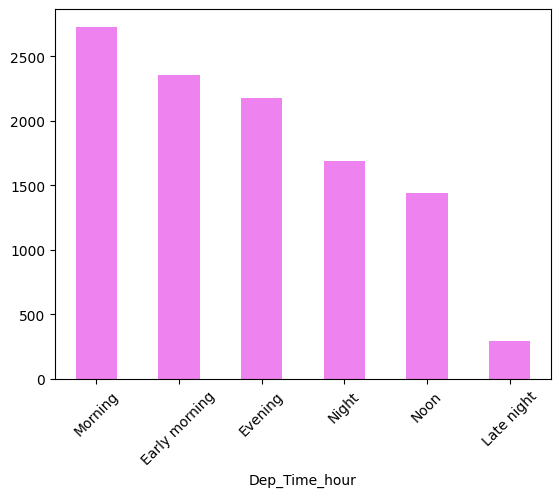

In [40]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar', color = 'violet') 
plt.xticks(rotation=45)

## lets use Cufflinks & plotly to make our visuals more interactive !

In [41]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot 
#because we want plot in this jupyter notebook, hence we need to set this plotly in offline mode
#plot is like matplotlib like command which can create your static charts
#iplot is an interactive plot which takes python code and makes a beautiful looking javascript plot 
#iplot is used when you are using ipython notebooks like jupyter notebook or google collab


In [42]:
init_notebook_mode(connected=True)

In [43]:
cf.go_offline()

In [44]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar',color='blue') #now see this is an interactive chart, you can see values when you hover your mouse cursor over plot

# Lets do more data cleaning and data preparation

In [45]:
data.head(5) #Now, lets make duration feature ready for data analysis and for modelling purpose

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


## Pre-process Duration Feature & extract meaningful features 

In [46]:
def preprocess_duration(x): #I want this function to return duration in __h  __m format
    if 'h' not in x:
        x='0h'+' '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x
    

In [47]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [48]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [49]:
data['Duration'][0].split(' ')

['2h', '50m']

I will create lamda function to do above operation in every element of duration column

In [50]:
data['Duration_hours']=data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1])) #x is a pointer to each row of duration feature

In [51]:
data['Duration_mins']=data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [52]:
data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0


In [53]:
data.shape

(10682, 17)

## Lets Analyse whether Duration impacts on Price or not ?

In [54]:
### eval is a in-built function of python which evaluates the “String” like a python expression and returns the result as an integer.
eval('2*60+50*1')

170

In [55]:
data['Duration'].str.replace('h','*60')

0        2*60 50m
1        7*60 25m
2        19*60 0m
3        5*60 25m
4        4*60 45m
           ...   
10678    2*60 30m
10679    2*60 35m
10680     3*60 0m
10681    2*60 40m
10682    8*60 20m
Name: Duration, Length: 10682, dtype: object

In [56]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval) 

In [57]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445


<Axes: xlabel='Duration_total_mins', ylabel='Price'>

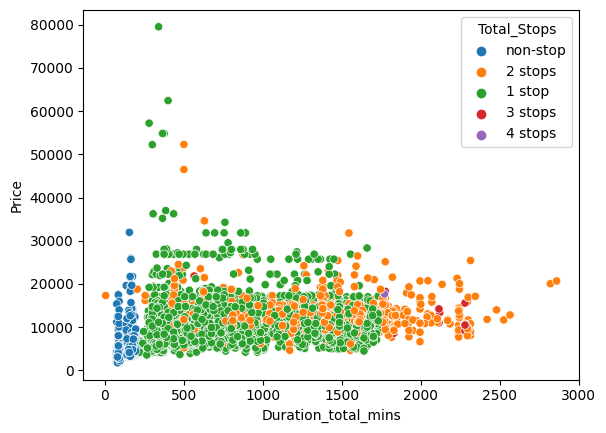

In [58]:
sns.scatterplot(x="Duration_total_mins",y="Price",data=data,hue="Total_Stops")

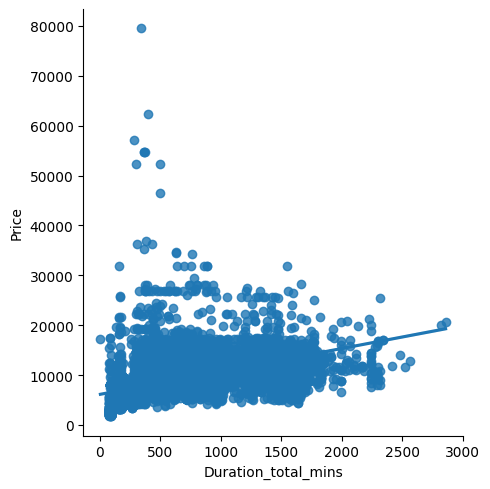

In [59]:
sns.lmplot(x='Duration_total_mins',y='Price',data=data) #it will plot regression plot --> see we got linear line


## Conclusion-->> pretty clear that As the duration of minutes increases Flight price also increases.

## which city has maximum final destination of flights ?

In [60]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [61]:
data['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

<Axes: ylabel='count'>

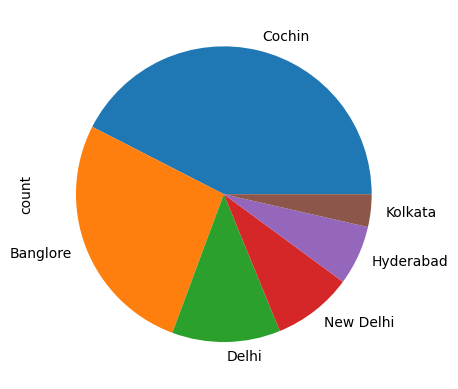

In [62]:
data['Destination'].value_counts().plot(kind='pie')

In [63]:
'''
Inference->> 
Final destination of majority of flights is Cochin. There are two values for Delhi destination which needs to be corrected,

'''

'\nInference->> \nFinal destination of majority of flights is Cochin. There are two values for Delhi destination which needs to be corrected,\n\n'

## Lets Perform Exploratory Data Analysis(Bivariate Analysis) to come up with some business insights
    Problem Statement-->> on which route Jet Airways is extremely used???

In [64]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [65]:
data['Airline']=='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [66]:
data[data['Airline']=='Jet Airways'].head(2) #get dataframe with only jet airways

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,18,55,10,25,15,30,930


In [67]:
data[data['Airline']=='Jet Airways'].groupby('Route').count()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
Route,,,,,,,,,,,,,,,,,
BLR → BDQ → DEL,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
BLR → BOM → DEL,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385,385
BLR → BOM → JDH → DEL,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
BLR → DEL,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382,382
BLR → MAA → DEL,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
BOM → BDQ → DEL → HYD,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
BOM → DED → DEL → HYD,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
BOM → DEL → HYD,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
BOM → HYD,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207,207


In [68]:
data[data['Airline']=='Jet Airways'].groupby('Route').size()

Route
BLR → BDQ → DEL            8
BLR → BOM → DEL          385
BLR → BOM → JDH → DEL      3
BLR → DEL                382
BLR → MAA → DEL           10
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → DEL → HYD            5
BOM → HYD                207
BOM → IDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
CCU → BOM → BLR          930
CCU → BOM → PNQ → BLR      4
CCU → DEL → BLR          300
CCU → GAU → BLR           22
DEL → AMD → BOM → COK    141
DEL → ATQ → BOM → COK     38
DEL → BDQ → BOM → COK     28
DEL → BHO → BOM → COK     29
DEL → BOM → COK          875
DEL → CCU → BOM → COK      1
DEL → COK                 34
DEL → DED → BOM → COK      2
DEL → IDR → BOM → COK     86
DEL → IXC → BOM → COK     13
DEL → JAI → BOM → COK    207
DEL → JDH → BOM → COK     23
DEL → LKO → BOM → COK     25
DEL → MAA → BOM → COK     16
DEL → NAG → BOM → COK     61
DEL → UDR → BOM → COK      7
dtype: int64

In [69]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

Conclusion --> On CCU → BOM → BLR, Jet airways are used most i.e. 930 times

## Airline vs Price Analysis
    ie finding price distribution & 5-point summary of each Airline..

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

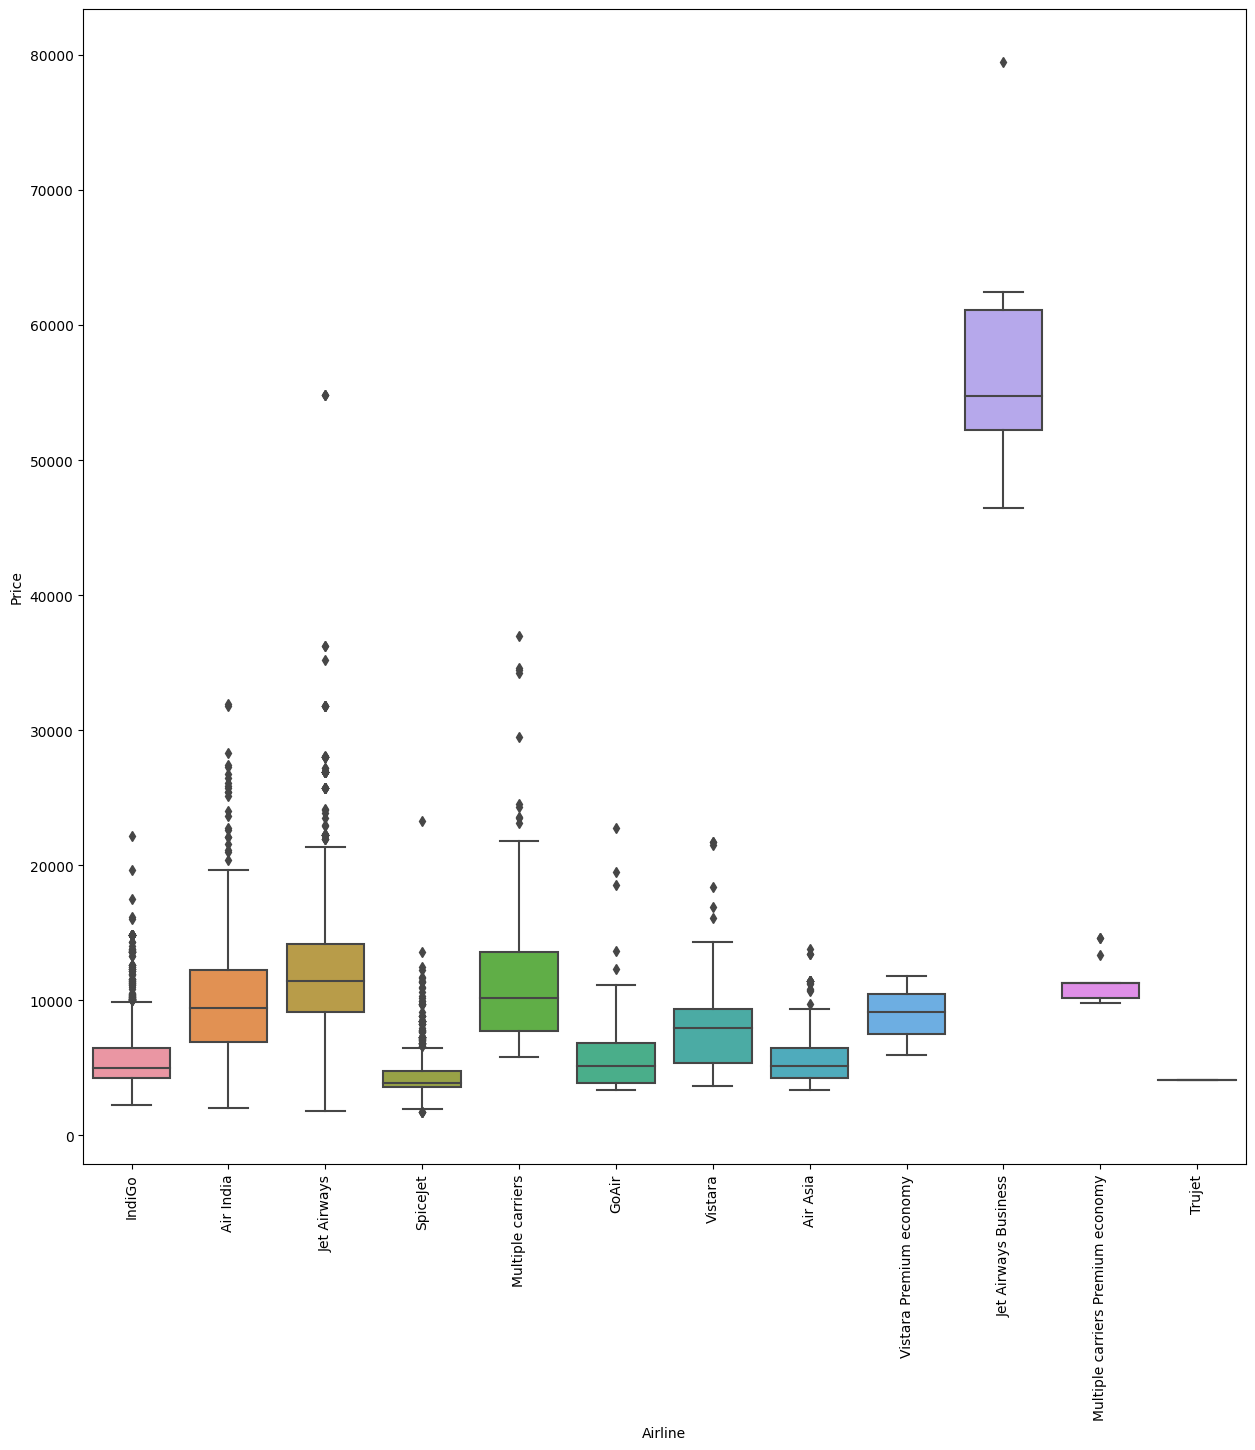

In [70]:
plt.figure(figsize=(15,15))
sns.boxplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

In [71]:
#Lets's see distribution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

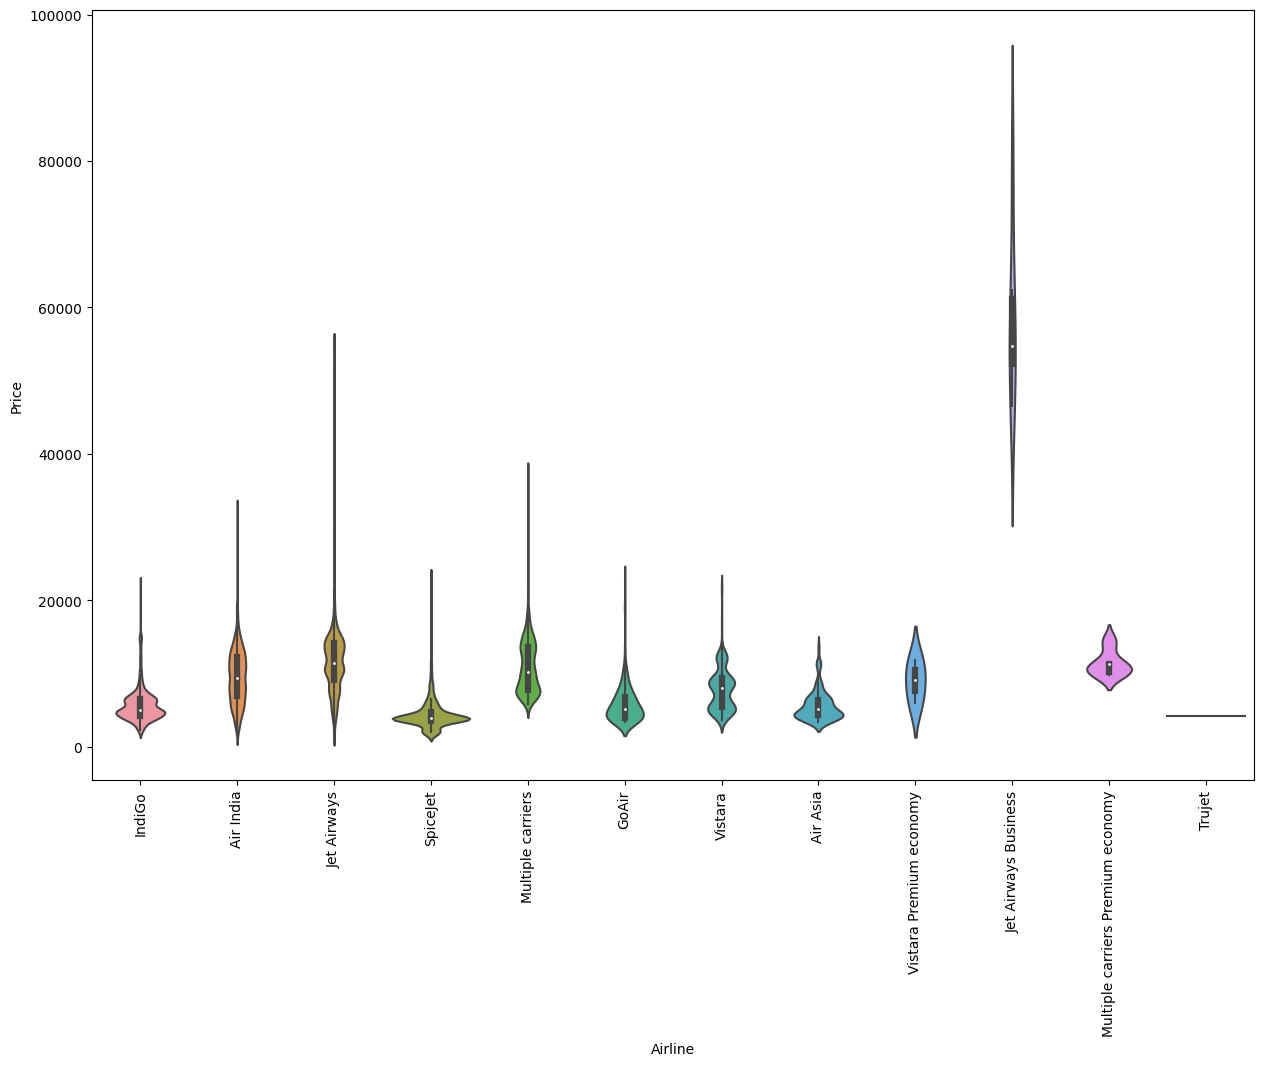

In [72]:
plt.figure(figsize=(15,10))
sns.violinplot(y='Price',x='Airline',data=data)
plt.xticks(rotation='vertical')

# Now we will focus on Feature Engineering

## Lets Perform Feature-Encoding on Data !
    Applying one-hot on data ! (One-hot is feature encoding technique)

In [73]:
data.head(4) #ML cannot understand categorical data --> so I need to feature encode it to numeric data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25,325


In [74]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

Additional_Info
No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: count, dtype: float64

In [75]:
# Additional_Info contains almost 80% no_info,so we can drop this column
# we can drop Route as well as we have pre-process that column (total stops is similar to route)
# Let's also drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"
# Journey Year is same in our data for all datavalues

data.drop(columns=['Additional_Info','Route','Duration_total_mins','journey_year'],axis=1,inplace=True)

In [76]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [77]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25


## Lets separate categorical data & numerical data !
    categorical data are those whose data-type is 'object'
    Numerical data are those whose data-type is either int of float

In [78]:
cat_col=[col for col in data.columns if data[col].dtype=='object']

In [79]:
num_col=[col for col in data.columns if data[col].dtype!='object']

In [80]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [81]:
num_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

## Handling Categorical Data

### Lets apply one-hot encoding on 'Source' feature !

In [82]:
### One-hot from scratch :

In [83]:
data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

In [84]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [85]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else 0) 

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [86]:
for category in data['Source'].unique():
    data['Source_'+category]=data['Source'].apply(lambda x: 1 if x==category else 0)

In [87]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,6,9,25,4,25,19,0,0,0,1,0,0


## Performing Target Guided Mean Encoding !

In [88]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [89]:
data['Airline'].nunique() 

12

I am going to encode my airline feature in context to target feature (in this case it will be price) --> I will find average of price for all subcategories. Whosoever has highest average value, I will asign higher importance to that airline 

In [90]:
data.groupby(['Airline'])['Price'].mean() 

Airline
Air Asia                              5590.260188
Air India                             9612.427756
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

In [91]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [92]:
airlines=data.groupby(['Airline'])['Price'].mean().sort_values().index

In [93]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [94]:
dict1={key:index for index, key in enumerate(airlines,0)} #key is nothing but airlines

In [95]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [96]:
data['Airline'].map(dict1)

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [97]:
data['Airline']=data['Airline'].map(dict1)

In [98]:
data['Airline'] #now we have numeric data in place of categorical data

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [99]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


In [100]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [101]:
data['Destination'].replace('New Delhi','Delhi',inplace=True) 

In [102]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

Now, We will do feature encoding for destination col as well

In [103]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [104]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [105]:
dict2={key:index for index,key in enumerate(dest,0)}

In [106]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [107]:
data['Destination']=data['Destination'].map(dict2)

In [108]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [109]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


### Perform Manual Encoding on Total_stops feature

In [110]:
data['Total_Stops'].unique() #below is ordinal data, so we can use label encoding technique, we will do it from scratch

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [111]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [112]:
data['Total_Stops']=data['Total_Stops'].map(stops)

In [113]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [114]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


In [115]:
#Since Source and Duration is extracted, so we can drop these values

In [116]:
data.drop(['Source','Duration'], axis =1,inplace=True)

In [117]:
data.head(2) #now we have all numerical data in dataframe

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0


## Performing Outlier Detection !

In [118]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1) #3 rows and 1 column
    
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2, orient='h') #h for horizontal orientation
    sns.distplot(df[col],ax=ax3,kde=False) #you will get histogram from seaborn if we put kde=False
    

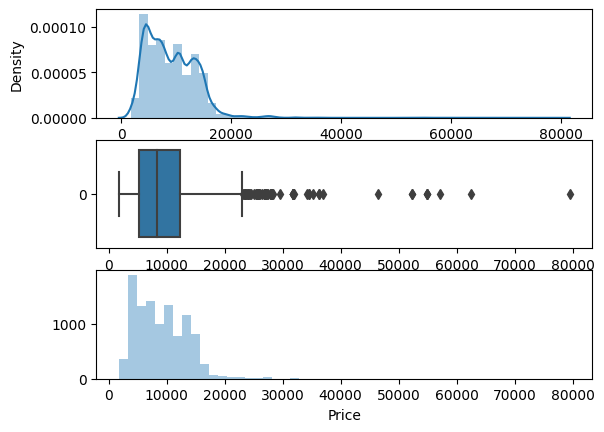

In [119]:
plot(data,'Price')

Conclusion --> High Positive Outliers are seen (Right Skweness)

In [120]:
q1 = np.percentile(data['Price'],25) #1st quartile
q3 = np.percentile(data['Price'],75) #2nd quartile
iqr = q3 - q1 #inter quartile range

maximum = q3 + 1.5 *  iqr
minimum = q1 - 1.5 * iqr

In [121]:
print(minimum,' ', maximum)

-5367.0   23017.0


In [122]:
print([price for price in data['Price'] if price > maximum or price < minimum]) #will give outliers

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [123]:
len([price for price in data['Price'] if price > maximum or price < minimum]) #we have 94 outliers

94

In [124]:
#Suppose my business team told to consider outliers above 35000 and replace it with median

In [125]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price']) 

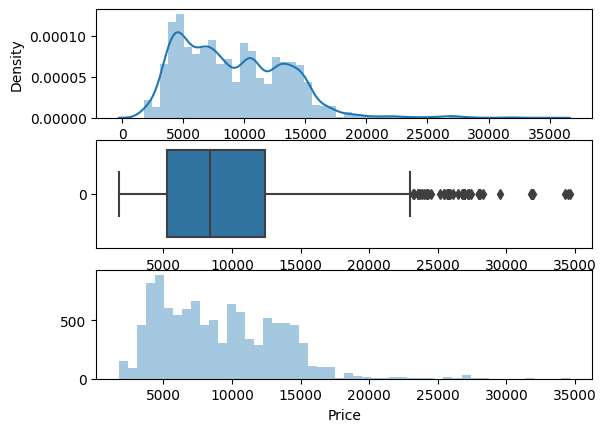

In [126]:
plot(data,'Price')

In [127]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,1,5,5,50,13,15,7,25,0,1,0,0,0


In [128]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int32
journey_month            int32
Dep_Time_hour            int32
Dep_Time_minute          int32
Arrival_Time_hour        int32
Arrival_Time_minute      int32
Duration_hours           int64
Duration_mins            int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

## Performing Feature Selection !

In [129]:
from sklearn.feature_selection import mutual_info_regression

1st I need to divide data into dependent and independent variables

In [130]:
X=data.drop(['Price'],axis=1)

In [131]:
y=data['Price']

In [132]:
X.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
journey_day            int32
journey_month          int32
Dep_Time_hour          int32
Dep_Time_minute        int32
Arrival_Time_hour      int32
Arrival_Time_minute    int32
Duration_hours         int64
Duration_mins          int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [133]:
im = mutual_info_regression(X,y)

In [134]:
im

array([0.97594799, 0.99951188, 0.800887  , 0.23402082, 0.62525627,
       0.33373786, 0.25592128, 0.39837632, 0.35579213, 0.46012995,
       0.34622171, 0.391357  , 0.46173477, 0.52610881, 0.14206011,
       0.19124003])

In [135]:
pd.DataFrame(im)

,0
0,0.975948
1,0.999512
2,0.800887
3,0.234021
4,0.625256
5,0.333738
6,0.255921
7,0.398376
8,0.355792
9,0.460130


In [136]:
pd.DataFrame(im, index=X.columns)

,0
Airline,0.975948
Destination,0.999512
Total_Stops,0.800887
journey_day,0.234021
journey_month,0.625256
Dep_Time_hour,0.333738
Dep_Time_minute,0.255921
Arrival_Time_hour,0.398376
Arrival_Time_minute,0.355792
Duration_hours,0.460130


In [137]:
imp=pd.DataFrame(mutual_info_regression(X,y),index=X.columns)
imp.columns=['importance']

In [138]:
imp.sort_values(by='importance',ascending=False) #sort according to feature "importance"

,importance
Destination,1.001052
Airline,0.975358
Total_Stops,0.794020
journey_month,0.629026
Source_Delhi,0.513931
Duration_hours,0.466499
Source_Kolkata,0.451535
Arrival_Time_hour,0.405496
Source_Banglore,0.394452
Arrival_Time_minute,0.345332


Conclusion --> Since we don't have many features and whatever features we have they have their own contributions so we will not drop any feature

## Lets build ML Model  , then later on we can think of saving it..

#### split dataset into train & test

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### what we often do in modelling:
    a.Initially ,lets build basic random forest model.
    b.then later-on , we will try to improve this model using some parameters.
    c.Then we will hyper-tune my model to get optimal value of parameters in order to achieve optimal value of parameters.

In [141]:
from sklearn.ensemble import RandomForestRegressor

In [142]:
ml_model=RandomForestRegressor()

In [143]:
model=ml_model.fit(X_train,y_train)

In [144]:
y_pred=model.predict(X_test)

In [145]:
y_pred

array([16818.3 ,  5374.6 ,  8849.69, ...,  3516.02,  6245.21,  6900.17])

In [146]:
y_pred.shape

(2671,)

In [147]:
len(X_test)

2671

In [148]:
from sklearn import metrics
r2_score=metrics.r2_score(y_test,y_pred)
print('r2_score: {}'.format(r2_score))

r2_score: 0.8119780749597649


### Saving ML model into disk and reusing it in future

In [149]:
import pickle

In [150]:
file=open(r'D:\Apps\Jupyter_files\MLProject_FlightPricePrediction/rf_random.pkl','wb')

In [151]:
pickle.dump(model,file)

In [152]:
model=open(r'D:\Apps\Jupyter_files\MLProject_FlightPricePrediction/rf_random.pkl','rb')

In [153]:
forest=pickle.load(model)

In [154]:
y_pred2 = forest.predict(X_test)

In [155]:
y_pred2

array([16818.3 ,  5374.6 ,  8849.69, ...,  3516.02,  6245.21,  6900.17])

In [156]:
from sklearn import metrics
r2_score=metrics.r2_score(y_test,y_pred2)
print('r2_score: {}'.format(r2_score))

r2_score: 0.8119780749597649


## Defining your own evaluation metric :

In [157]:
def mape(y_true,y_pred):                               #Mean Absolute Percentage Error 
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    
    return np.mean(np.abs((y_true-y_pred)/y_true))*100 #operation in numpy array is operated on each element of numpy array

In [158]:
mape(y_test,forest.predict(X_test))

13.091641831133519

In [159]:
mape(y_test,y_pred)

13.091641831133519

In [160]:
y_test.dtypes

dtype('float64')

In [161]:
type(np.array(y_test))

numpy.ndarray

## Automating ML Pipeline :

In [178]:
def predict(ml_model):
    
    model=ml_model.fit(X_train,y_train)
    Score=model.score(X_train,y_train)
    print(f'Training_score: {Score}') 
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    #precision=metrics.precision_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE : ', mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)     #I need to plot distribution of actual-prediction values OR distribution of error
    

Training_score: 0.9516810784871692
Predictions are : [16813.54        5448.55        8830.05       ...  3524.11
  6509.21333333  6835.07      ]


r2_score: 0.8103379157747441
MSE :  3692265.5274083754
MAE :  1177.364574091047
RMSE :  1921.5268739750625
MAPE :  13.20349773604968


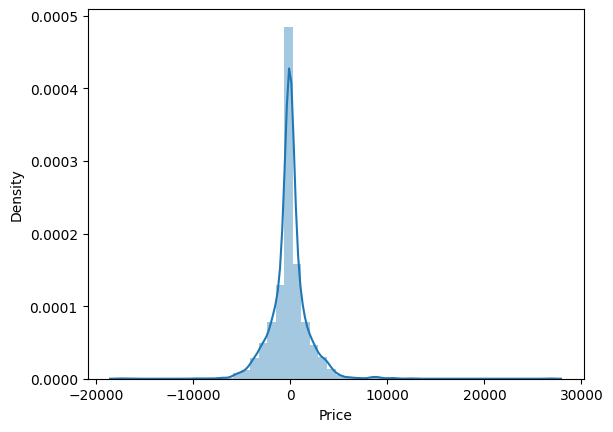

In [179]:
predict(RandomForestRegressor())

Conclusion from above plot --> Since peak is at 0, so it means that for most of values you will encounter negligible error

Training_score: 0.9267860784284722
Predictions are : [16940.393   6747.7656  8456.393  ...  3392.2395  8824.6     6879.504 ]


r2_score: 0.8297771460016091
MSE :  3313830.375547638
MAE :  1162.118984003899
RMSE :  1820.3929179019672
MAPE :  13.16601615844134


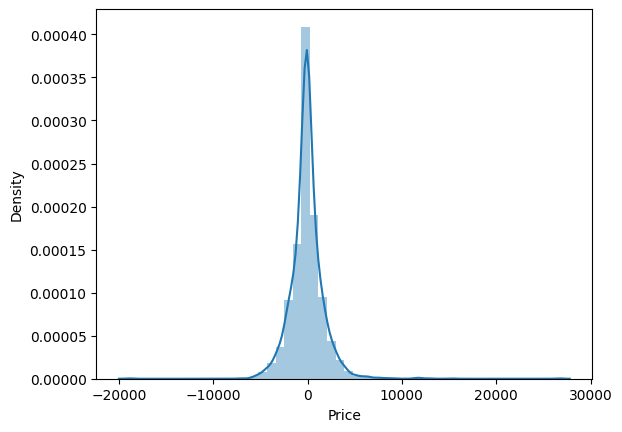

In [180]:
from xgboost import XGBRegressor
predict(XGBRegressor())

Training_score: 0.47622019722881037
Predictions are : [16840.  4959.  8452. ...  4077.  5797.  6818.]


r2_score: 0.6530652796223684
MSE :  6753986.246349682
MAE :  1495.4129539498315
RMSE :  2598.843251592847
MAPE :  16.562354149920694


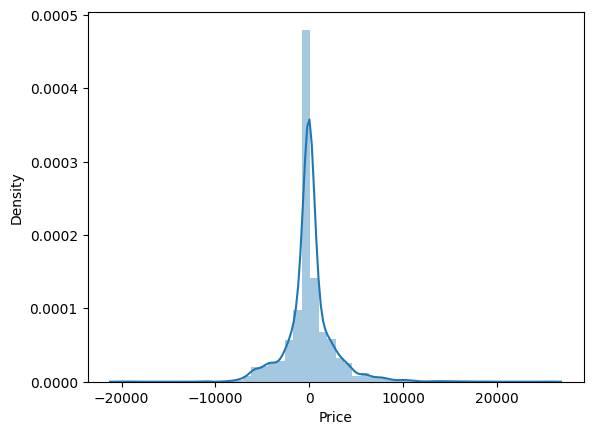

In [181]:
from sklearn.naive_bayes import GaussianNB
predict(GaussianNB())

Conclusion --> As per accuracy XGBoost > RandomForestRegressor > Naive_Bayes 

## Hypertuning ml model

In [182]:
from sklearn.model_selection import RandomizedSearchCV #importing Cross-Validation Algorithm 

In [183]:
### initialising estimator
reg_rf=RandomForestRegressor()

In [184]:
np.linspace(start=100,stop=1200,num=6) 

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [185]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=5)]

# Number of features to consider at every split --> possible values of max_features
max_features=["log2", "sqrt", None] 

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[2,5,15,100]

In [186]:
# Create the grid or hyper-parameter space
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
    
}

In [187]:
random_grid #HYPER PARAMETER SPACE

{'n_estimators': [100, 375, 650, 925, 1200],
 'max_features': ['log2', 'sqrt', None],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [2, 5, 15, 100]}

Now, we have to find optimum parameters from above dictionary

In [188]:
rf_Random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=2,verbose=2,n_jobs=-1)

In [189]:
rf_Random.fit(X_train,y_train) #it will start doing 5*3*4*4*2 = 480 iterations

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_split': [2, 5, 15, 100],
                                        'n_estimators': [100, 375, 650, 925,
                                                         1200]},
                   verbose=2)

In [190]:
### to get your best model..you need to initialise your ML with below parameters
rf_Random.best_params_

{'n_estimators': 650,
 'min_samples_split': 5,
 'max_features': 'log2',
 'max_depth': 30}

In [191]:
pred2=rf_Random.predict(X_test)

In [192]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8195296377501715

Training_score: 0.9513982597987513
Predictions are : [16838.3   5310.41  8888.34 ...  3572.68  6389.91  6867.15]


r2_score: 0.8148563537404774
MSE :  3604302.3859784002
MAE :  1170.722641217356
RMSE :  1898.500035812062
MAPE :  13.190101265519635


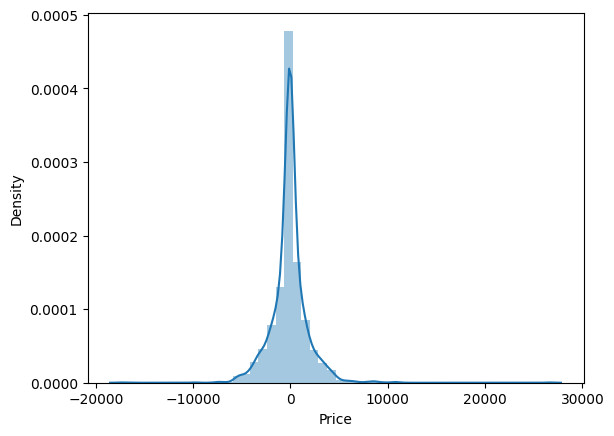

In [193]:
predict(RandomForestRegressor()) #In this the parameters were not hypertuned